### Install

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.7/641.7 kB 16.6 MB/s eta 0:00:0000:01


### Ultralytics Yolo Directory

In [2]:
# Ultralytics Yolo directory
!mkdir /kaggle/working/dataset
!cd /kaggle/working/dataset; mkdir images; mkdir labels
!cd /kaggle/working/dataset/images; mkdir train; mkdir val
!cd /kaggle/working/dataset/labels; mkdir train; mkdir val

### Make train/val data & Convert to Yolo format

In [3]:
!git clone https://github.com/giyeongyoon/mushroom_yolo.git

Cloning into 'mushroom_yolo'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 2.33 MiB | 6.73 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
%cd /kaggle/working/mushroom_yolo/utils
%run data_reader.ipynb
%run convert_format.ipynb

/kaggle/working/mushroom_yolo/utils


In [5]:
train_df = make_train_val_df('/kaggle/input/mushroom-dataset/TS5_', '/kaggle/input/mushroom-dataset/TL5_')
val_df = make_train_val_df('/kaggle/input/mushroom-dataset/VS5_', '/kaggle/input/mushroom-dataset/VL5_')

train_tiny_df = train_df.sample(n=3200, random_state=1004)
val_tiny_df = val_df.sample(n=800, random_state=1004)

In [7]:
# train용 images와 labels annotation 생성.
make_yolo_anno_file(train_tiny_df, '/kaggle/working/dataset/images/train/', '/kaggle/working/dataset/labels/train/')

# val용 images와 labels annotation 생성
make_yolo_anno_file(val_tiny_df, '/kaggle/working/dataset/images/val/', '/kaggle/working/dataset/labels/val/')

### Train

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model

# Train the model
model.train(data='/kaggle/working/mushroom_yolo/mushroom_kaggle.yaml', epochs=20, imgsz=640, batch=16)

100%|██████████| 6.23M/6.23M [00:00<00:00, 162MB/s]
Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/mushroom_yolo/mushroom_kaggle.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, c

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/dataset/labels/train... 3200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3200/3200 [00:01<00:00, 2105.64it/s]
train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/dataset/labels/val... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 1239.23it/s]
val: New cache created: /kaggle/working/dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:312: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  plt.savefig(fname, dpi=200)
/opt/conda/lib/python3.10/site-packages/ultraly

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▄▆▅▆▆▆▆▆▆▇▆▇▇█▇▇▇██
metrics/mAP50-95(B),▁▃▅▄▅▅▆▆▆▇▆▆▇▇▇▇▇███
metrics/precision(B),▁▄▆▅▆▇▆▇▇▇▇▆██▇█▆▇██
metrics/recall(B),▁▃▅▅▆▆▇▅▆▇▇▆▇▇█▇█▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,███▇▆▅▅▄▄▄▃▃▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ebb5df59c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Val

In [11]:
# Validate the model
metrics = model.val()  # evaluate model performance on the validation set
print(f'map50-95: {metrics.box.map}')    # map50-95
print(f'map50: {metrics.box.map50}')  # map50
print(f'map75: {metrics.box.map75}')  # map75
print(f'map50-95 of each category: {metrics.box.maps}')   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
val: Scanning /kaggle/working/dataset/labels/val.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.02it/s]
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:352: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:352: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:377: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:377: Us

map50-95: 0.6322579176733565
map50: 0.7467354909845352
map75: 0.7004696996014734
map50-95 of each category: [    0.63226]


### Plotting results


0: 640x384 1 표고, 1: 640x384 2 표고s, 2: 640x384 1 표고, 3: 640x384 1 표고, 4: 640x384 1 표고, 5: 640x384 2 표고s, 11.9ms
Speed: 2.6ms preprocess, 2.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


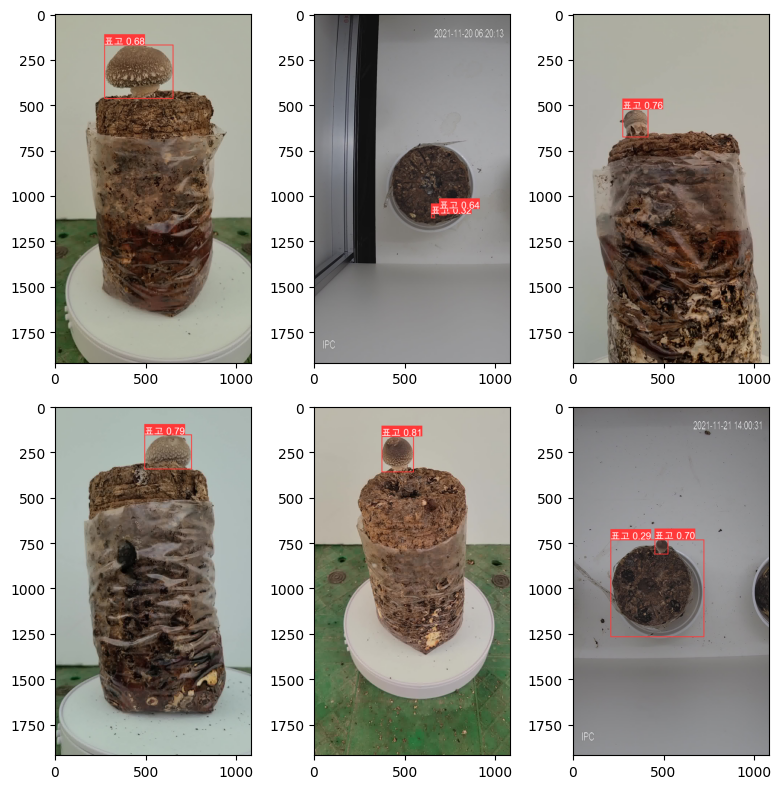

In [51]:
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

val_img_arr = list(glob('/kaggle/working/dataset/images/val/*.jpg'))
idx = np.random.randint(0, len(val_img_arr), 6)
val_imgs = [val_img_arr[i] for i in idx]

results = model(val_imgs)  # predict on an image

# Show the results
ax = plt.subplots(2, 3, figsize=(8, 8), tight_layout=True)[1].ravel()

for i, r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    ax[i].imshow(im)